In [1]:
import os
os.chdir("C:/Users/hp/Downloads/LinearRegressionusingPython/Linear Regression using Python")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
from sklearn.linear_model import LinearRegression                                           

In [2]:
df=pd.read_csv("Fish_dataset.csv")                                            

In [3]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [4]:
df.shape

(159, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [6]:
df.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [7]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


### Plot bar chart

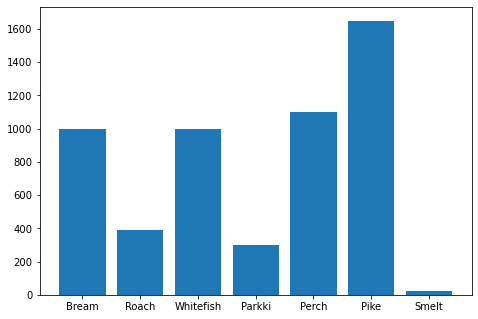

In [8]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df['Species'],df['Weight'])
plt.show()

### Identify outliers

<AxesSubplot:>

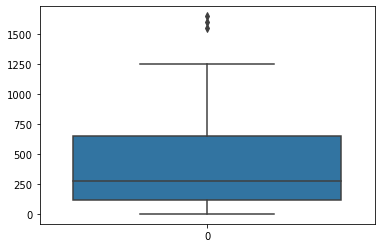

In [9]:
sns.boxplot(data=df['Weight'])

<AxesSubplot:>

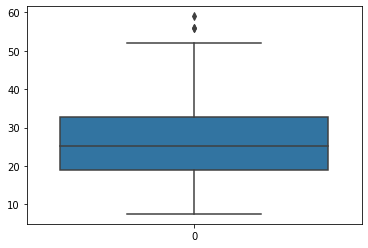

In [10]:
sns.boxplot(data=df['Length1'])

<AxesSubplot:>

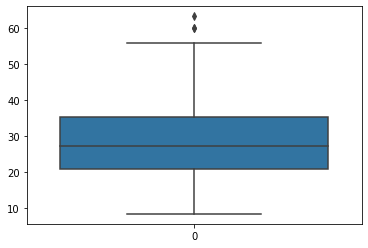

In [11]:
sns.boxplot(data=df['Length2'])

<AxesSubplot:>

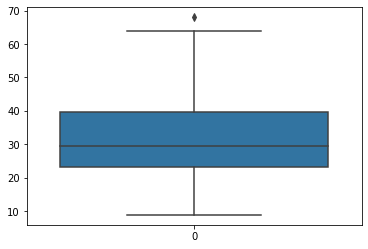

In [12]:
sns.boxplot(data=df['Length3'])

<AxesSubplot:>

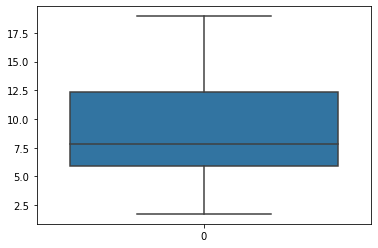

In [13]:
sns.boxplot(data=df['Height'])

<AxesSubplot:>

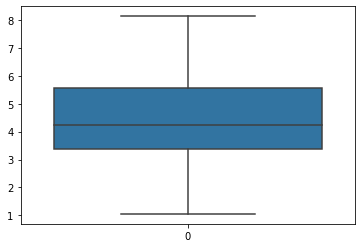

In [14]:
sns.boxplot(data=df['Width'])

In [15]:
Q1 = df.Weight.quantile(0.25)
Q1

120.0

In [16]:
Q3 = df.Weight.quantile(0.75)
Q3

650.0

In [17]:
IQR = Q3-Q1
IQR

530.0

In [18]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-675.0, 1445.0)

In [19]:
df[(df.Weight<lower_limit)|(df.Weight>upper_limit)]

,Species,Weight,Length1,Length2,Length3,Height,Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


In [20]:
df.drop(142,inplace=True)

In [21]:
df.drop(143,inplace=True)

In [22]:
df.drop(144,inplace=True)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight'>

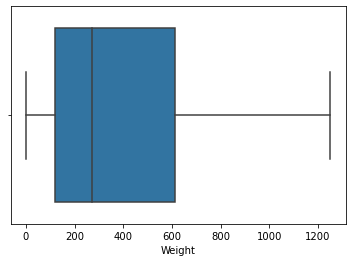

In [23]:
sns.boxplot(df['Weight'])

In [24]:
Q1 = df.Length1.quantile(0.25)
Q1

19.0

In [25]:
Q3 = df.Length1.quantile(0.75)
Q3

32.125

In [26]:
IQR = Q3-Q1
IQR

13.125

In [27]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-0.6875, 51.8125)

In [28]:
df[(df.Length1<lower_limit)|(df.Length1>upper_limit)]

,Species,Weight,Length1,Length2,Length3,Height,Width
141,Pike,1250.0,52.0,56.0,59.7,10.6863,6.9849


In [29]:
Q1 = df.Length2.quantile(0.25)
Q1

21.0

In [30]:
Q3 = df.Length2.quantile(0.75)
Q3

35.0

In [31]:
IQR = Q3-Q1
IQR

14.0

In [32]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(0.0, 56.0)

In [33]:
df[(df.Length2<lower_limit)|(df.Length2>upper_limit)]

,Species,Weight,Length1,Length2,Length3,Height,Width


In [34]:
Q1 = df.Length3.quantile(0.25)
Q1

23.025000000000002

In [35]:
Q3 = df.Length3.quantile(0.75)
Q3

39.425

In [36]:
IQR = Q3-Q1
IQR

16.399999999999995

In [37]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-1.5749999999999922, 64.02499999999999)

In [38]:
df[(df.Length3<lower_limit)|(df.Length3>upper_limit)]

,Species,Weight,Length1,Length2,Length3,Height,Width


In [39]:
df.drop(141,inplace=True)

In [40]:
df.tail(50)

,Species,Weight,Length1,Length2,Length3,Height,Width
105,Perch,250.0,25.4,27.5,28.9,7.2828,4.5662
106,Perch,250.0,25.9,28.0,29.4,7.8204,4.2042
107,Perch,300.0,26.9,28.7,30.1,7.5852,4.6354
108,Perch,320.0,27.8,30.0,31.6,7.6156,4.7716
109,Perch,514.0,30.5,32.8,34.0,10.0300,6.0180
110,Perch,556.0,32.0,34.5,36.5,10.2565,6.3875
111,Perch,840.0,32.5,35.0,37.3,11.4884,7.7957
112,Perch,685.0,34.0,36.5,39.0,10.8810,6.8640
113,Perch,700.0,34.0,36.0,38.3,10.6091,6.7408
114,Perch,700.0,34.5,37.0,39.4,10.8350,6.2646


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Length1'>

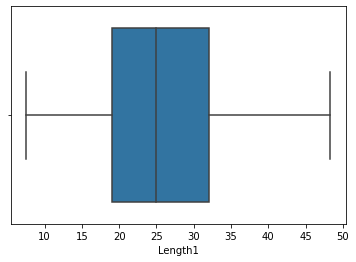

In [41]:
sns.boxplot(df['Length1'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Length2'>

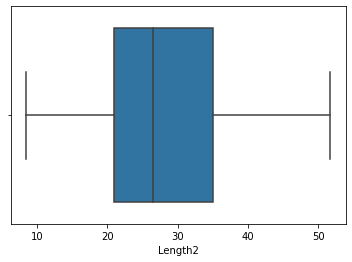

In [42]:
sns.boxplot(df['Length2'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Length3'>

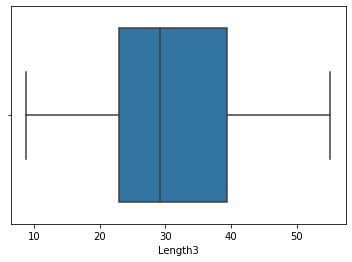

In [43]:
sns.boxplot(df['Length3'])

In [44]:
df2 = df.reset_index()

In [45]:
print(df2)

     index Species  Weight  Length1  Length2  Length3   Height   Width
0        0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1        1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2        2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3        3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4        4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..     ...     ...     ...      ...      ...      ...      ...     ...
150    154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
151    155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
152    156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
153    157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
154    158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[155 rows x 8 columns]


In [46]:
df2.shape

(155, 8)

<AxesSubplot:>

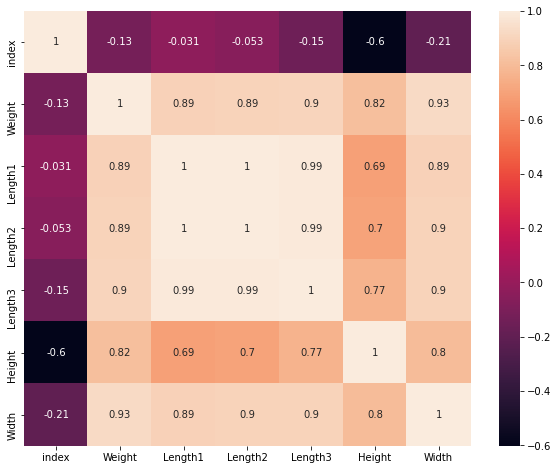

In [47]:
plt.figure(figsize=[10,8])
sns.heatmap(df2.corr(),annot=True)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


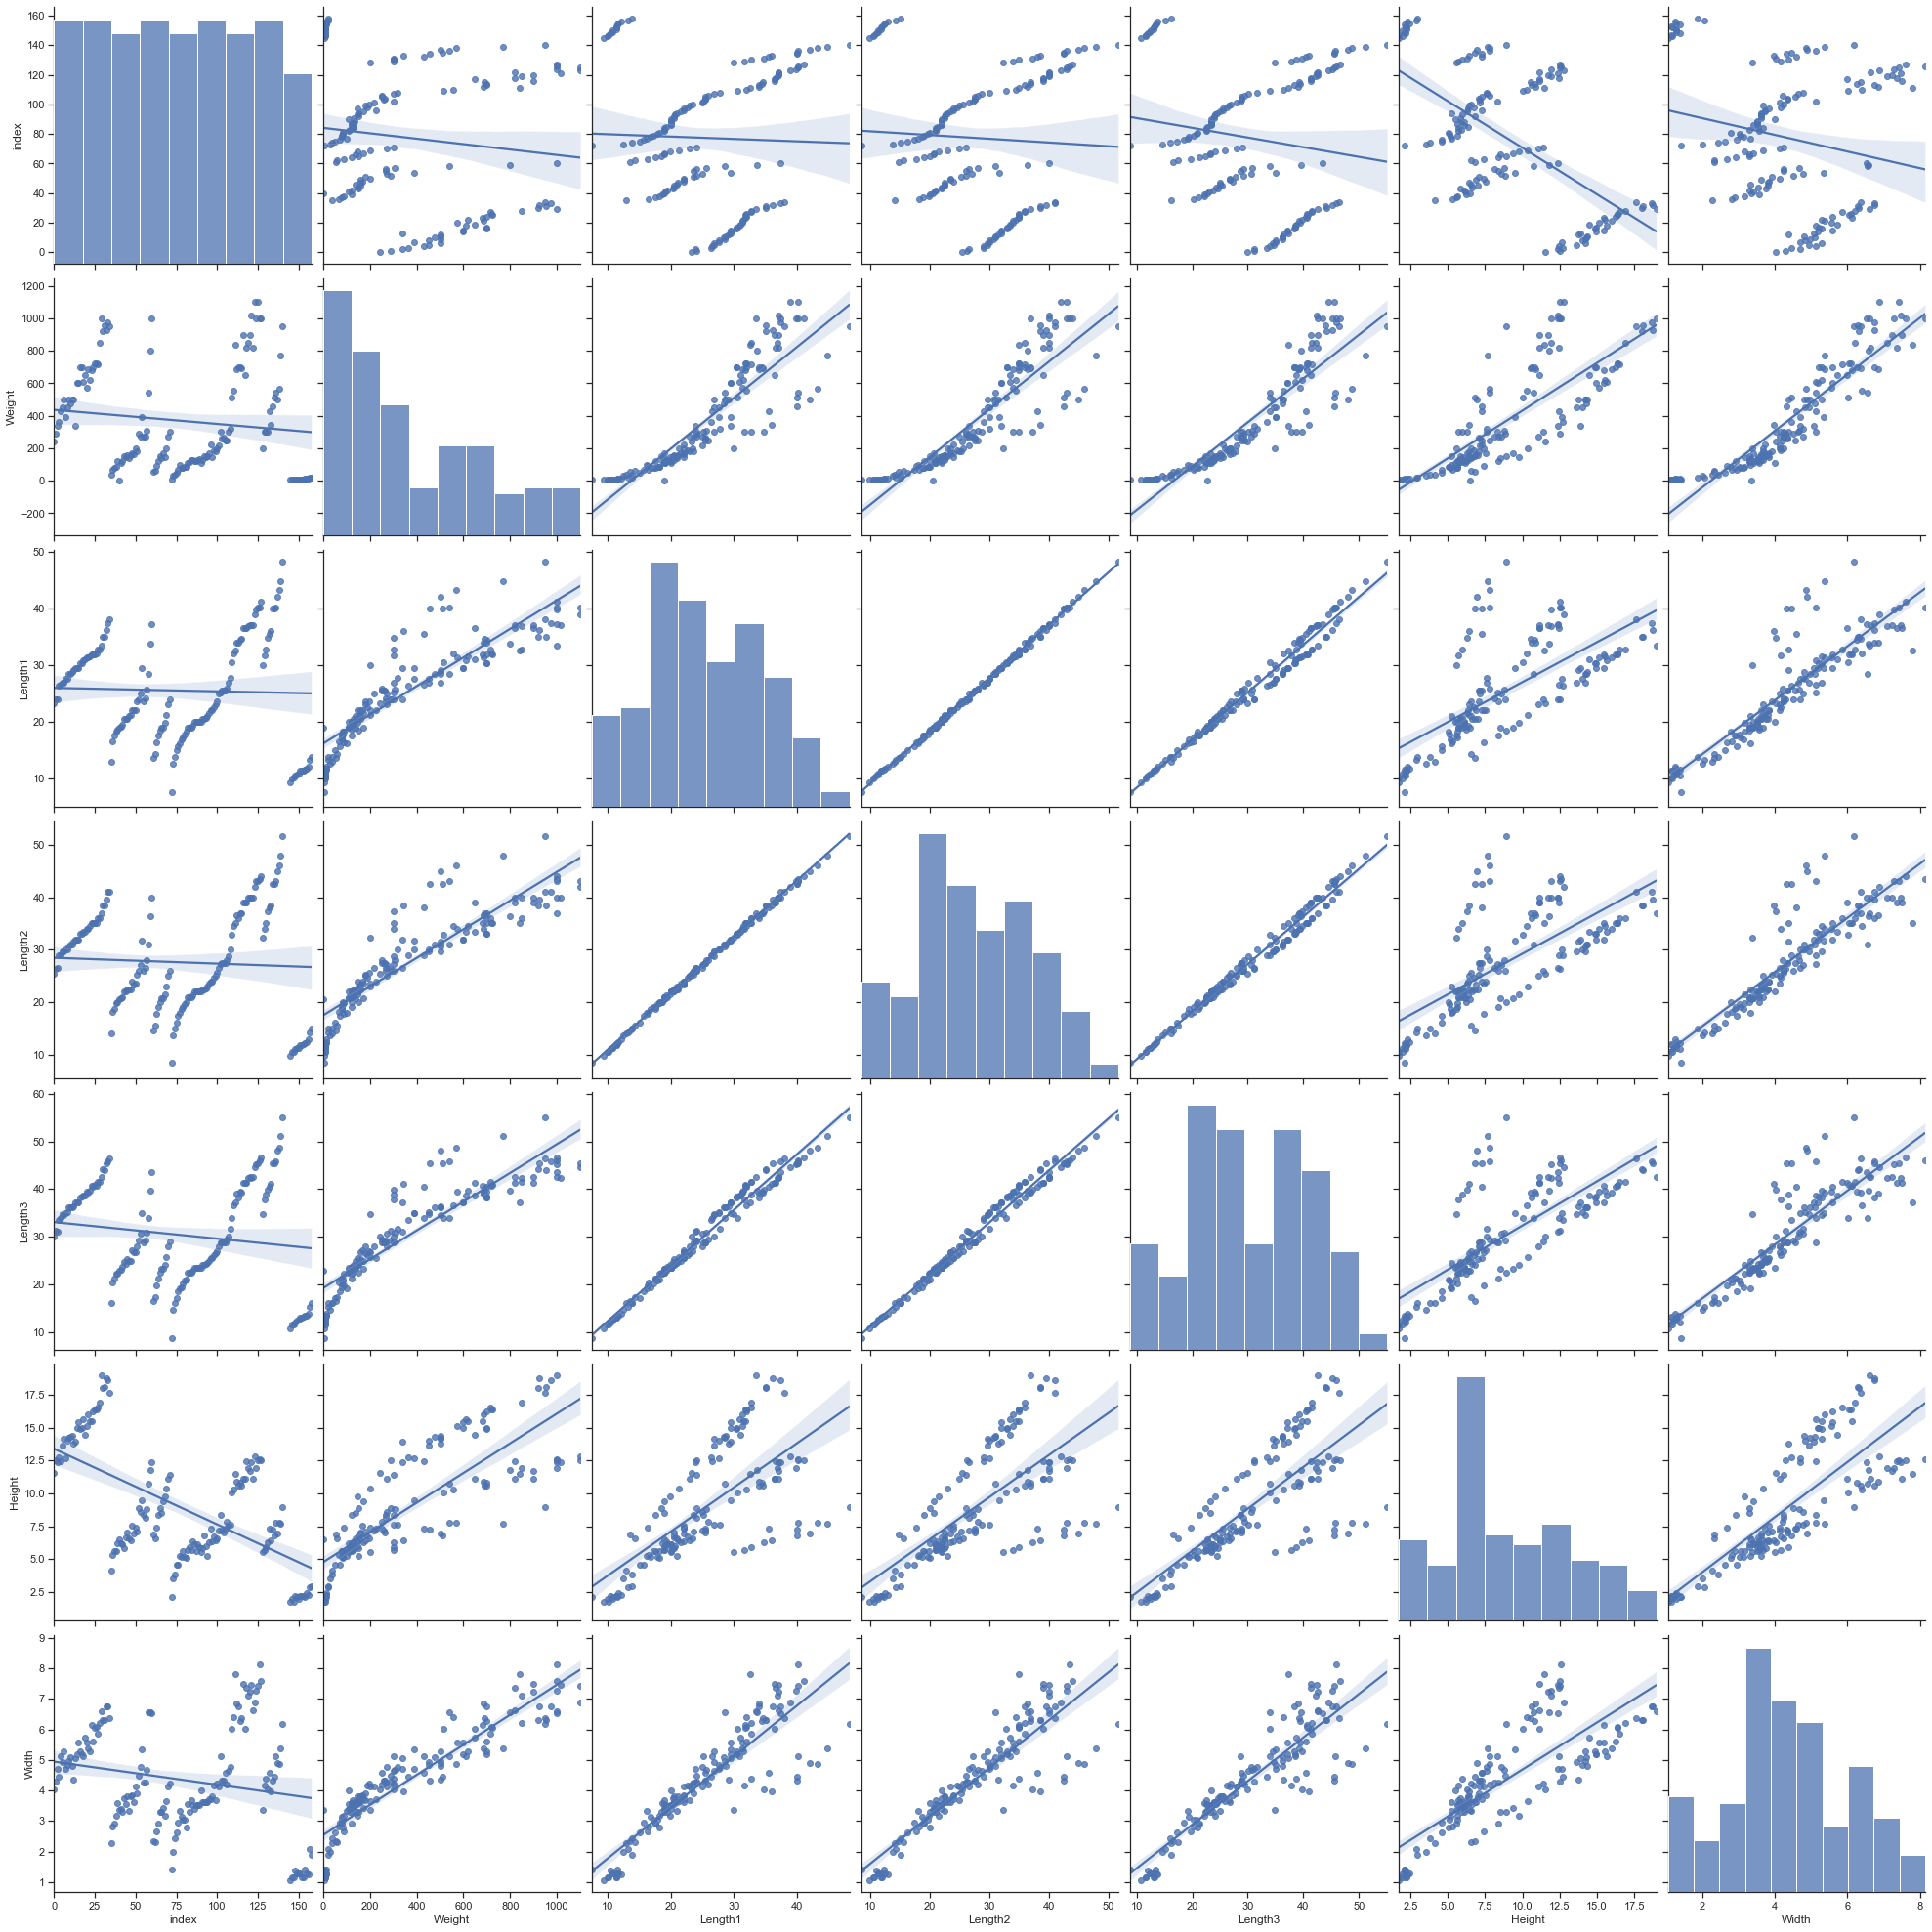

In [48]:
#Pair plot
sns.set(style='ticks')
sns.pairplot(df2,size=4,kind='reg')

### the mean score of the model at 95% confidence interval

In [93]:
import scipy.stats as st
st.norm.interval(alpha=0.95, loc=np.mean(df2), scale=st.sem(df2))

(array([ 70.20290499,   1.97406117, 320.34808513,  24.08503248,
         26.10013817,  28.73519884,   8.25731371,   4.09687904]),
 array([ 84.51967565,   2.51626142, 418.79901165,  26.88658042,
         29.10889408,  32.03125277,   9.62255339,   4.62089257]))

#### The 95% confidence interval mean score is (27.4291, 30.6708)

In [51]:
#Converting categorical variable into numeric using LabelEncoder.
df2_cat=df2.select_dtypes(include='object').columns

In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
#Label encoding categorical variables
for c in df2_cat:
    lbl=LabelEncoder()
    lbl.fit(list(df2[c].values))
    df2[c]=lbl.transform(list(df2[c].values))

In [54]:
df2[c].dtype

dtype('int64')

### Linear Regression with all variables

In [55]:
#Linear Regression with all variables.
lm=LinearRegression()

In [56]:
y=df2['Weight']

In [57]:
x=df2.drop(['Weight'],axis=1)

In [58]:
x.columns

Index(['index', 'Species', 'Length1', 'Length2', 'Length3', 'Height', 'Width'], dtype='object')

In [59]:
df2['Species'].dtype

dtype('int64')

In [60]:
lm.fit(x,y)

LinearRegression()

In [61]:
print("Intercept for the multiple Linear regression is:",lm.intercept_)
print("Coef for multiple linear regression is:",lm.coef_)

Intercept for the multiple Linear regression is: -726.8281123968286
Coef for multiple linear regression is: [  2.18839043  24.12602836  14.69195703 -10.23030617   1.38217587
  53.42828484  59.93828255]


In [62]:
yhat=lm.predict(x)

In [63]:
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt
mse=mean_squared_error(y,yhat)
r_squared=r2_score(y,yhat)
rmse=sqrt(mse)

In [64]:
print("Mean_squared_error:",mse)
print("Root_mean_squared_error:",rmse)
print("r_square_value:",r_squared)

Mean_squared_error: 5853.467038953656
Root_mean_squared_error: 76.50795408945174
r_square_value: 0.9397427906729914


In [65]:
#Take the values as X and Y
x=x.values
y=y.values

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


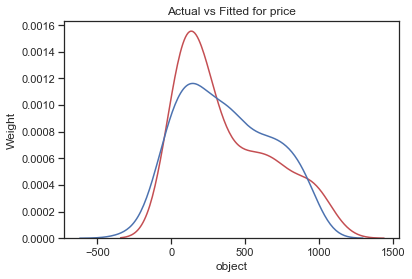

In [66]:
#distribution plot to compare actual vs predicted values for price
ax1=sns.distplot(df2['Weight'],hist=False,color='r',label='Actual values')
sns.distplot(yhat,hist=False,color='b',label='Fitted values',ax=ax1)
plt.title('Actual vs Fitted for price')
plt.xlabel('object')
plt.ylabel('Weight')
plt.show()

### Standard Scaling

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
scale=StandardScaler()

In [69]:
x_sc=scale.fit_transform(x)

In [70]:
lm_sc=lm.fit(x_sc,y)

In [71]:
yhat_sc=lm.predict(x_sc)

In [72]:
mse=mean_squared_error(y,yhat_sc)
r_squared=r2_score(y,yhat_sc)
rmse=sqrt(mse)

In [73]:
print("Mean_squared_error:",mse)
print("Root_mean_squared_error:",rmse)
print("r_square_value:",r_squared)

Mean_squared_error: 5853.467038953653
Root_mean_squared_error: 76.50795408945173
r_square_value: 0.9397427906729914


### Linear Regression with Train-Test Split

In [74]:
#split data into train and test format
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)

In [75]:
model=LinearRegression()

In [76]:
model.fit(x_train,y_train)

LinearRegression()

In [77]:
#prediction for a train data
pred=model.predict(x_train)

In [78]:
#Score/Accuracy
print('Accuracy',model.score(x_train,y_train)*100)

Accuracy 93.75409503249173


In [79]:
mse=mean_squared_error(y_train,pred)
r_squared=r2_score(y_train,pred)
rmse=sqrt(mse)

In [80]:
print("Mean_squared_error:",mse)
print("Root_mean_squared_error:",rmse)
print("r_square_value:",r_squared)

Mean_squared_error: 5800.785986946
Root_mean_squared_error: 76.16289114093556
r_square_value: 0.9375409503249174


In [81]:
#Prediction for test data.
pred_t=model.predict(x_test)

In [82]:
#Score/Accuracy
print('Accuracy',model.score(x_test,y_test)*100)

Accuracy 94.29210713471726


In [83]:
mse=mean_squared_error(y_test,pred_t)
r_squared=r2_score(y_test,pred_t)
rmse=sqrt(mse)

In [84]:
print("Mean_squared_error:",mse)
print("Root_mean_squared_error:",rmse)
print("r_square_value:",r_squared)

Mean_squared_error: 6428.558370483483
Root_mean_squared_error: 80.17829114220059
r_square_value: 0.9429210713471725


### conclusion

#### if the value of R2 is 0.9429 then this suggest that 94.2% of the variance in Y can be explained with the elp of given explanatory variable in that model in other words. it explains the proportion of variance in the dependant varibale that is explained by the independent variable.
#### on addition of new variable the error is sure to describe thus R square always increse whenever a new variable is added to our model.This may not describe the importance of a variable.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


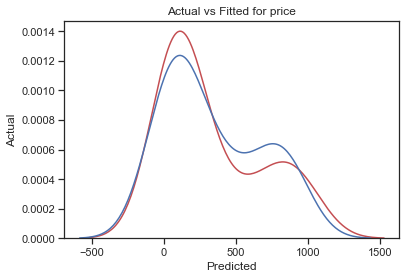

In [85]:
#Distribution plot of actual and predicted values
ax1=sns.distplot(y_test,hist=False,color='r',label='Actual values')
sns.distplot(pred_t,hist=False,color='b',label='Predicted values',ax=ax1)
plt.title('Actual vs Fitted for price')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Cross validation on Linear Regression 

In [86]:
model.fit(x_train,y_train)

LinearRegression()

In [87]:
model.score(x_test,y_test)

0.9429210713471725

In [88]:
model.score(x_train,y_train)

0.9375409503249174

In [89]:
from sklearn.model_selection import cross_val_score

In [90]:
Rcross=cross_val_score(model,x_train,y_train,cv=4)

In [91]:
Rcross     

array([0.91622898, 0.9241772 , 0.92663164, 0.90843585])